# Description

## Mushroom Edible Classification
<br>

Dataset Source :

https://www.kaggle.com/datasets/uciml/mushroom-classification

<br>

Problem : 

The purpose of this model is to use the categorical properties of mushrooms to classify whether they are edible or not.

<br>

 > 1. EDA : 

<br>


CountPlot, Kramer V Coef 

<br>

> 2. Feature Selection : 

<br>

Based Kramer V Coef

      T1 : Drop gil-attachment, stalk-color-above-ring

      Used Features : 19

      T2 : Use Odor, spore-print-color

      Used Features : 2

<br>

> 3. Preprocessing :

<br>

    LabelEncoder : All Features

    OnehotEncoder (unique>=3) ? OnehotEncoder : None

<br>


 > 4. Modeling : 
 
 <br>
 
 Train , Test = 8 : 2 

<br>

 All : Stratified K-Fold(N-folds : 5) and Optuna Tuning
 
 
                     Use Model : SVM,   DT,  MLPClassifier

                     Hyper Parameter from Optuna, S-kfold(5)

    SVM : params {'C': 72.17831419000564, 'kernel': 'poly'}

    DT : params {'criterion': 'gini', 'max_depth': 27}

    MLPClassifier : params {'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'tanh'}





<br>

> 5. Result :

<br>

All Model : 

      Macro-F1 score : 1.0 , Accuracy : 1.0

# Data Load & Simple Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np


In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/BIohealthDataset/mushrooms.csv')

In [ ]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


> 결측치는 존재하지 않는다.

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


속성 정보: (등급: 식용=e, 독성=p)


모자 모양: 벨=b, 원추형=c, 볼록=x, 평면=f, 손잡이=k,가라앉은=s



캡 표면: 섬유질=f,홈=g,비늘 모양=y,매끄러운=s



캡 색상: 갈색=n,담황색=b,시나몬=c,회색=g,녹색=r,분홍색=p,보라색=u,빨간색=e,흰색=w,노란색=y



타박상: 타박상=t,아니오=f



냄새: 아몬드=a,아니스=l,크레오소트=c,비린내=y,파울=f,곰팡이=m,없음=n,매운=p,매운=s



아가미 부착: 부착=a,내림차순=d,자유=f,노치=n



아가미 간격: 닫기=c, 붐비는=w, 먼=d



아가미 크기: 넓음=b, 좁음=n



아가미 색상: 검정=k,갈색=n,버프=b,초콜릿=h,회색=g, 녹색=r,주황색=o,분홍색=p,보라색=u,빨간색=e,흰색=w,노란색= 와이



줄기 모양: 확대=e, 테이퍼링=t



줄기-뿌리: 구근=b,클럽=c,컵=u,동일=e,근근형=z,뿌리=r,누락=?



줄기-표면-위-고리: 섬유질=f,비늘=y,실키=k,매끄러운=s



줄기-표면-아래-고리: 섬유질=f,비늘=y,실키=k,부드러운=s



고리 위의 줄기 색상: 갈색=n,담황색=b,시나몬=c,회색=g,
주황색=o,분홍색=p,빨간색=e,흰색=w,노란색=y



줄기색-아래-고리: 갈색=n,담황색=b,시나몬=c,회색=g,주황색=o,분홍색=p,빨간색=e,흰색=w,노란색=y



베일형: 부분=p,보편=u



베일 색상: 갈색=n,주황색=o,흰색=w,노란색=y



링 번호: 없음=n, 1=o, 2=t



반지 유형: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z



spore-print-color: 검정=k,갈색=n,버프=b,초콜릿=h,녹색=r,주황색=o,보라색=u,흰색=w,노란색=y



인구: 풍부=a,군집=c,수많은=n,흩어진=s,여러=v,단독=y



서식지: 잔디=g,잎=l,초원=m,경로=p,도시=u,폐기물=w,나무=d



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

> Unique한 값 

In [ ]:
for i in data.columns:
  
  print(i, " : " ,data[i].nunique())

class  :  2
cap-shape  :  6
cap-surface  :  4
cap-color  :  10
bruises  :  2
odor  :  9
gill-attachment  :  2
gill-spacing  :  2
gill-size  :  2
gill-color  :  12
stalk-shape  :  2
stalk-root  :  5
stalk-surface-above-ring  :  4
stalk-surface-below-ring  :  4
stalk-color-above-ring  :  9
stalk-color-below-ring  :  9
veil-type  :  1
veil-color  :  4
ring-number  :  3
ring-type  :  5
spore-print-color  :  9
population  :  6
habitat  :  7


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
def count_plot(data, col):
  sns.countplot(data=data,x=data[col],hue=data['class'])
  plt.title(col)
  plt.legend()
  plt.show()


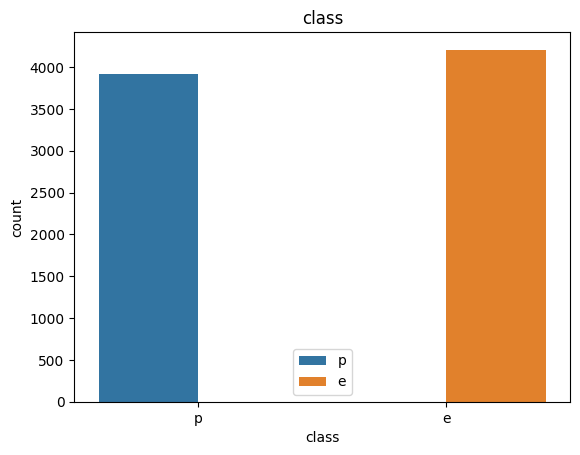

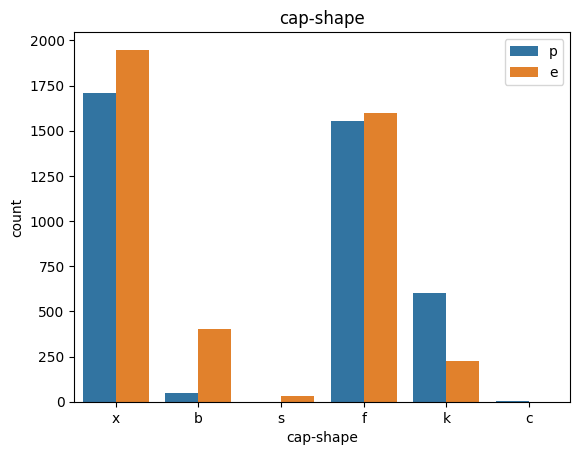

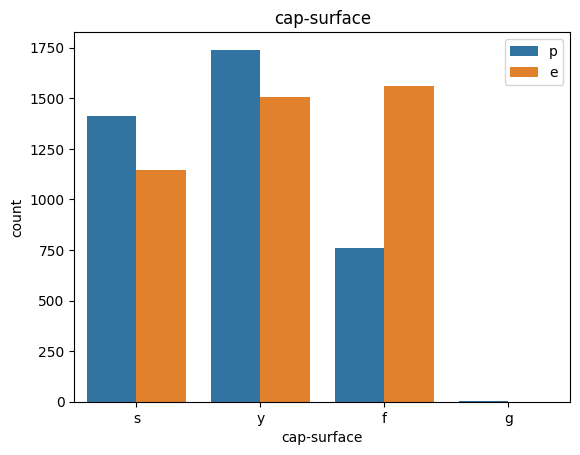

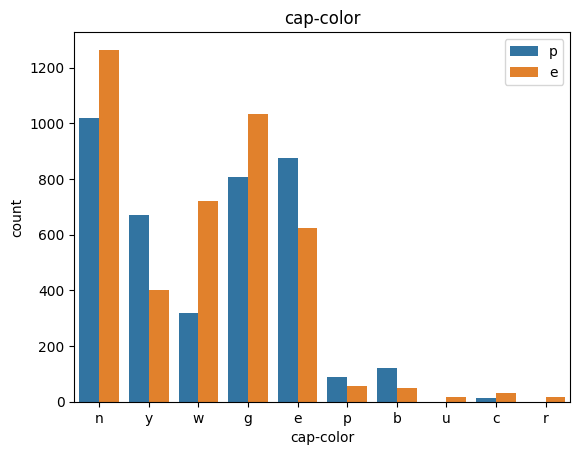

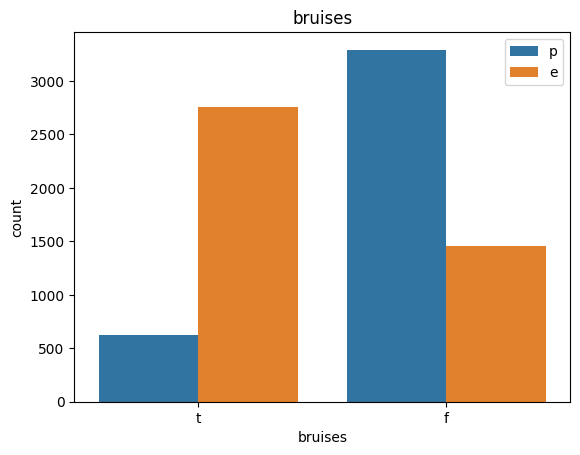

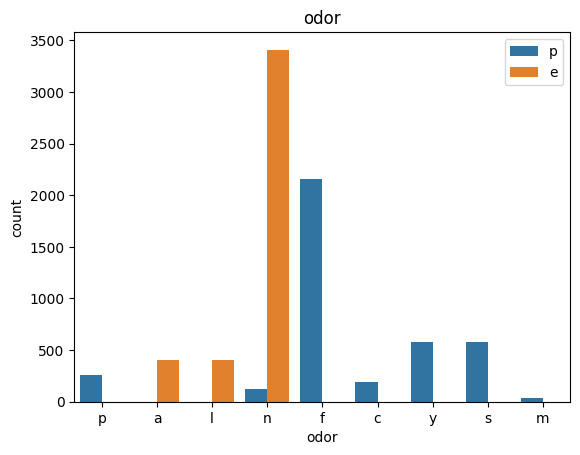

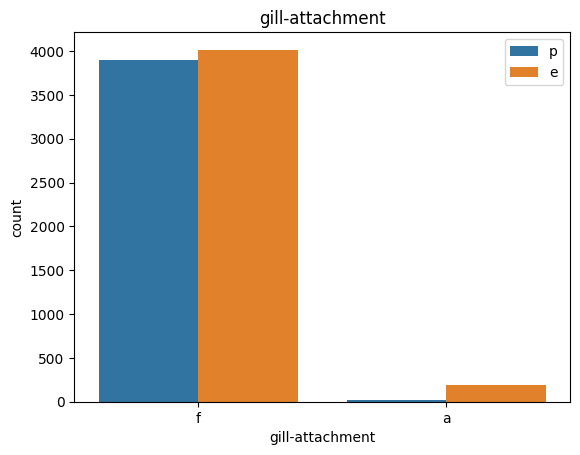

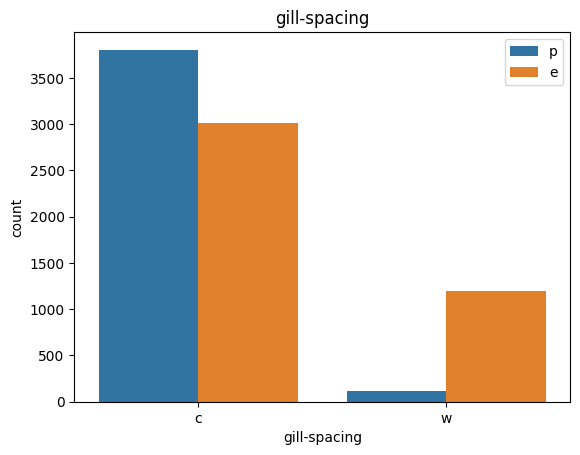

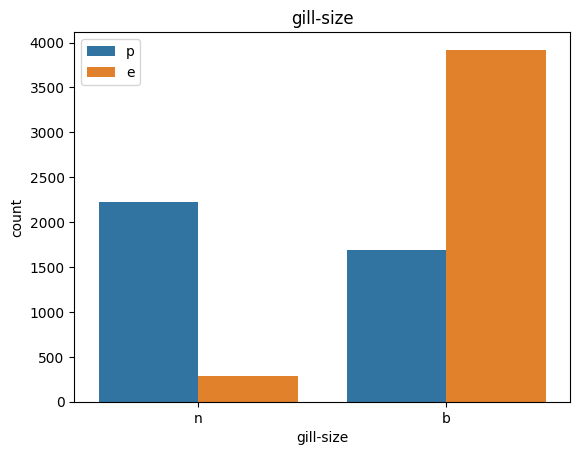

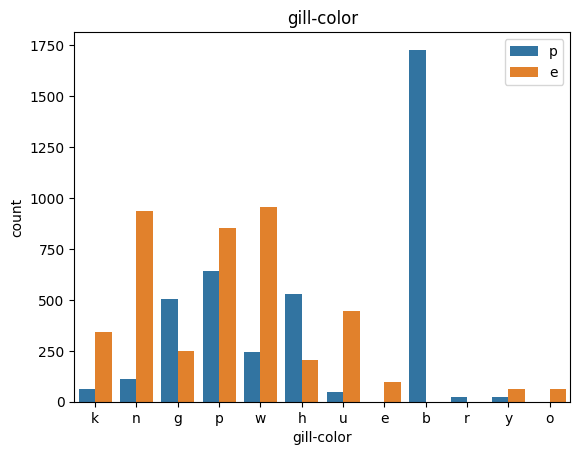

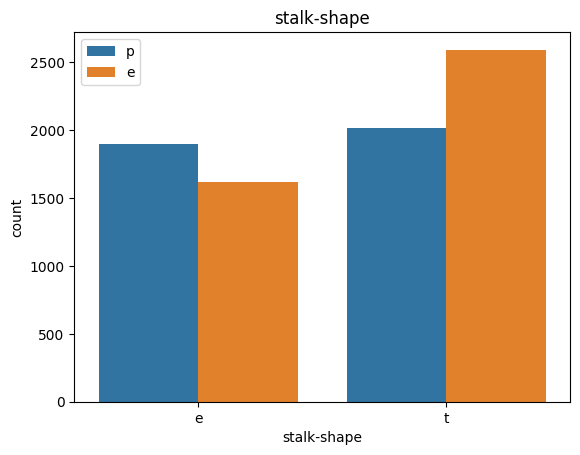

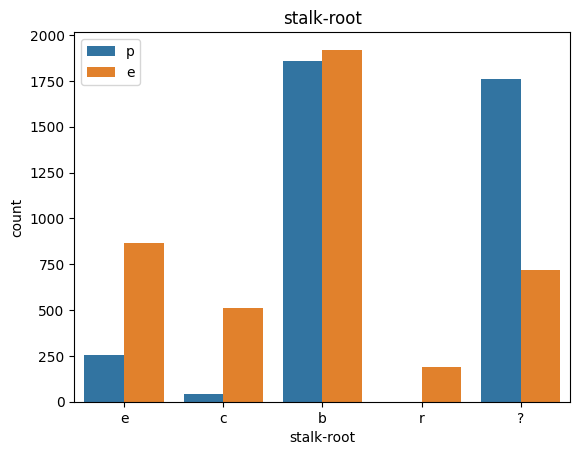

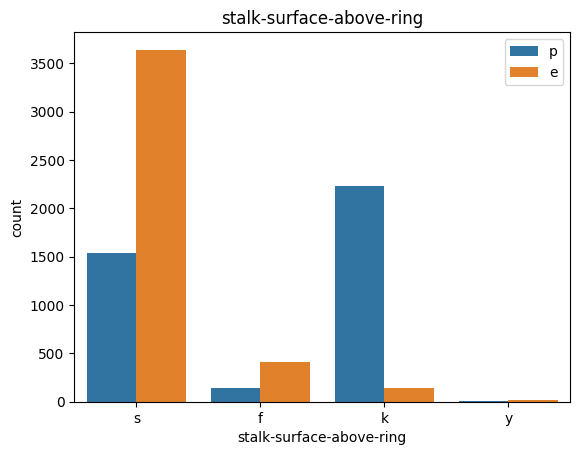

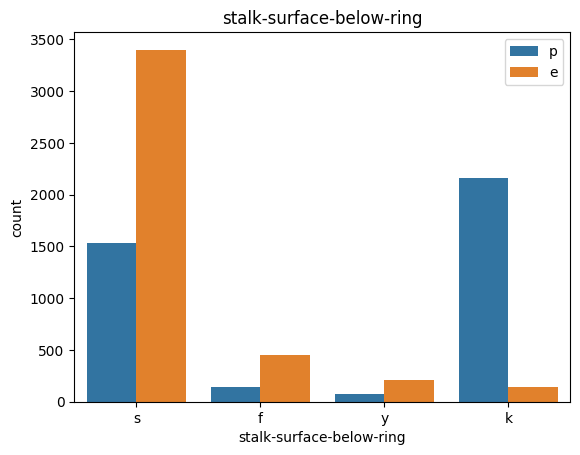

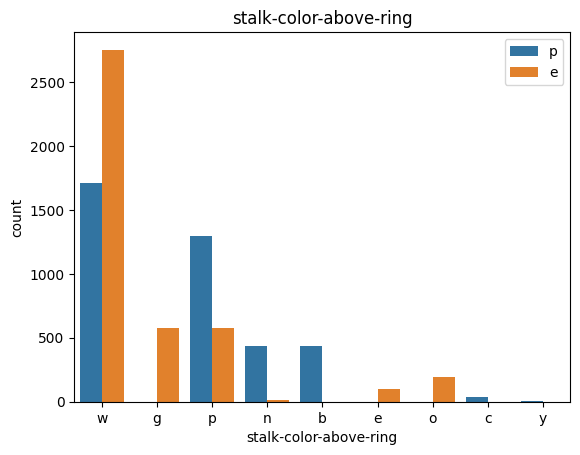

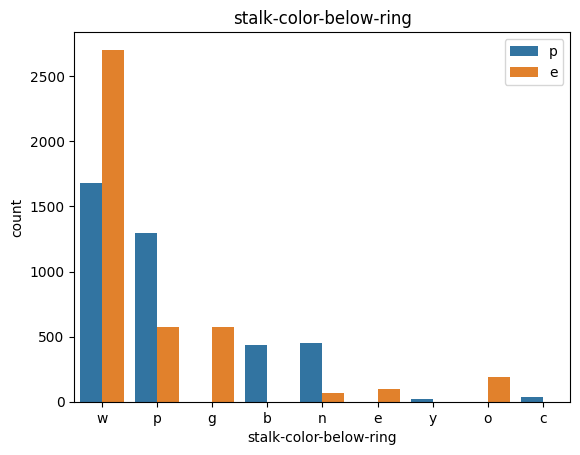

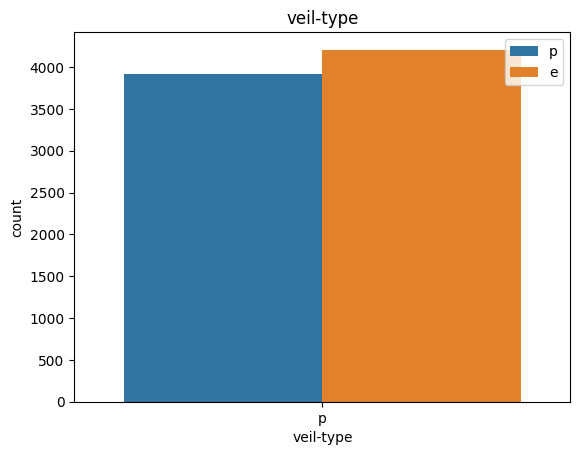

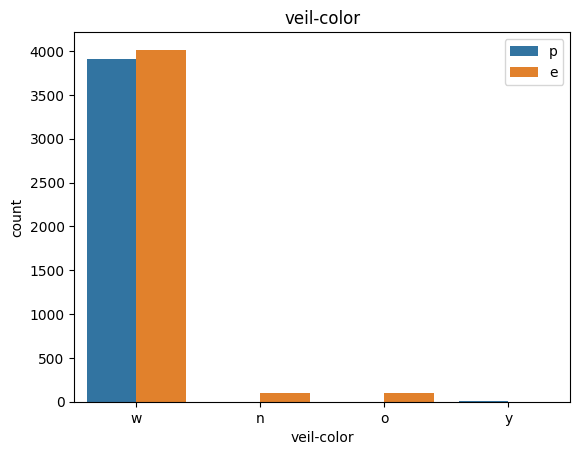

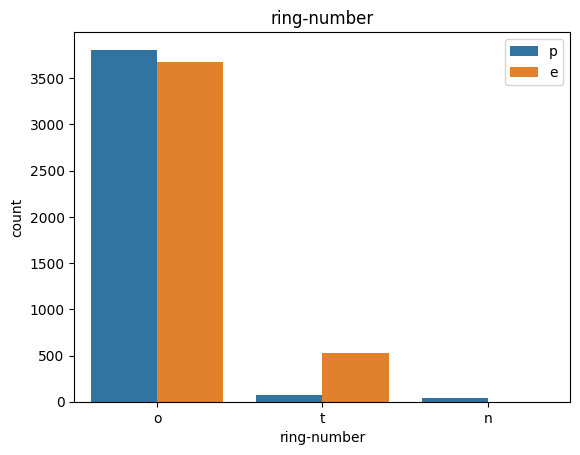

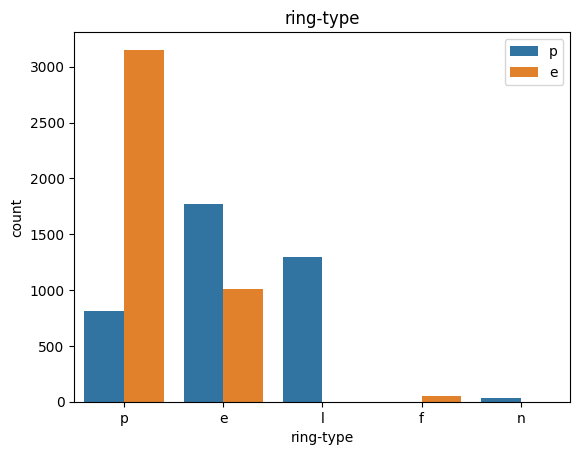

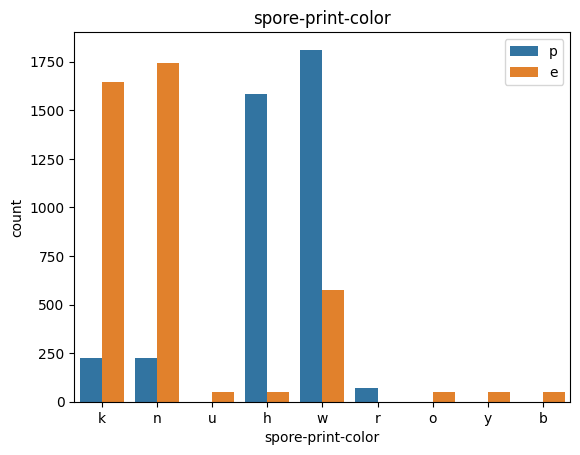

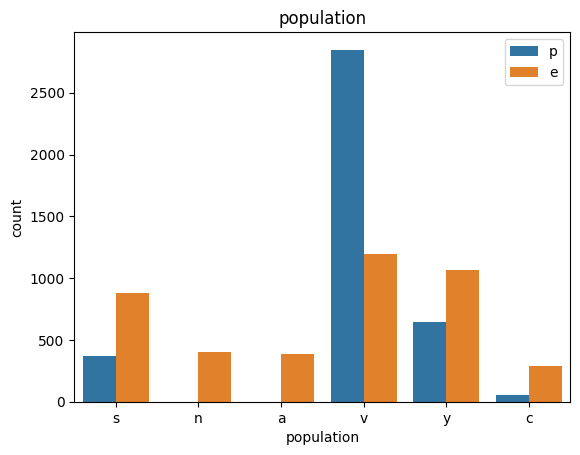

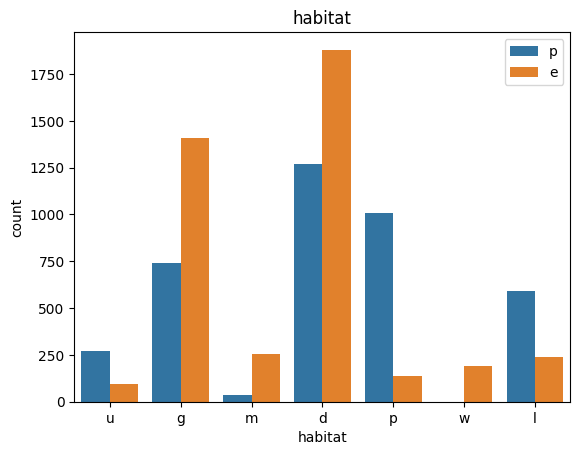

In [ ]:

for col in data.columns:
  count_plot(data,col)
   

In [4]:
# veil특성은 unique값이 1이므로, 제외한다.

data =data.drop('veil-type',axis=1)

> 크라머 상관계수 분석

In [6]:
from sklearn.feature_selection import chi2, RFECV
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import scipy.stats as ss


In [7]:
from sklearn.model_selection import train_test_split

In [203]:


train_df, test_df=train_test_split(data,test_size=.2,random_state=5)

In [169]:
train_df['class'].value_counts()

e    3381
p    3118
Name: class, dtype: int64

In [170]:
test_df['class'].value_counts()

e    827
p    798
Name: class, dtype: int64

In [ ]:
train_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
rows= []

for var1 in data:
  col = []
  for var2 in data :
    confusion_matrix = pd.crosstab(data[var1], data[var2])
     # Cramer's V test
    col.append(round(cramers_v(confusion_matrix.values),2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_corr = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)



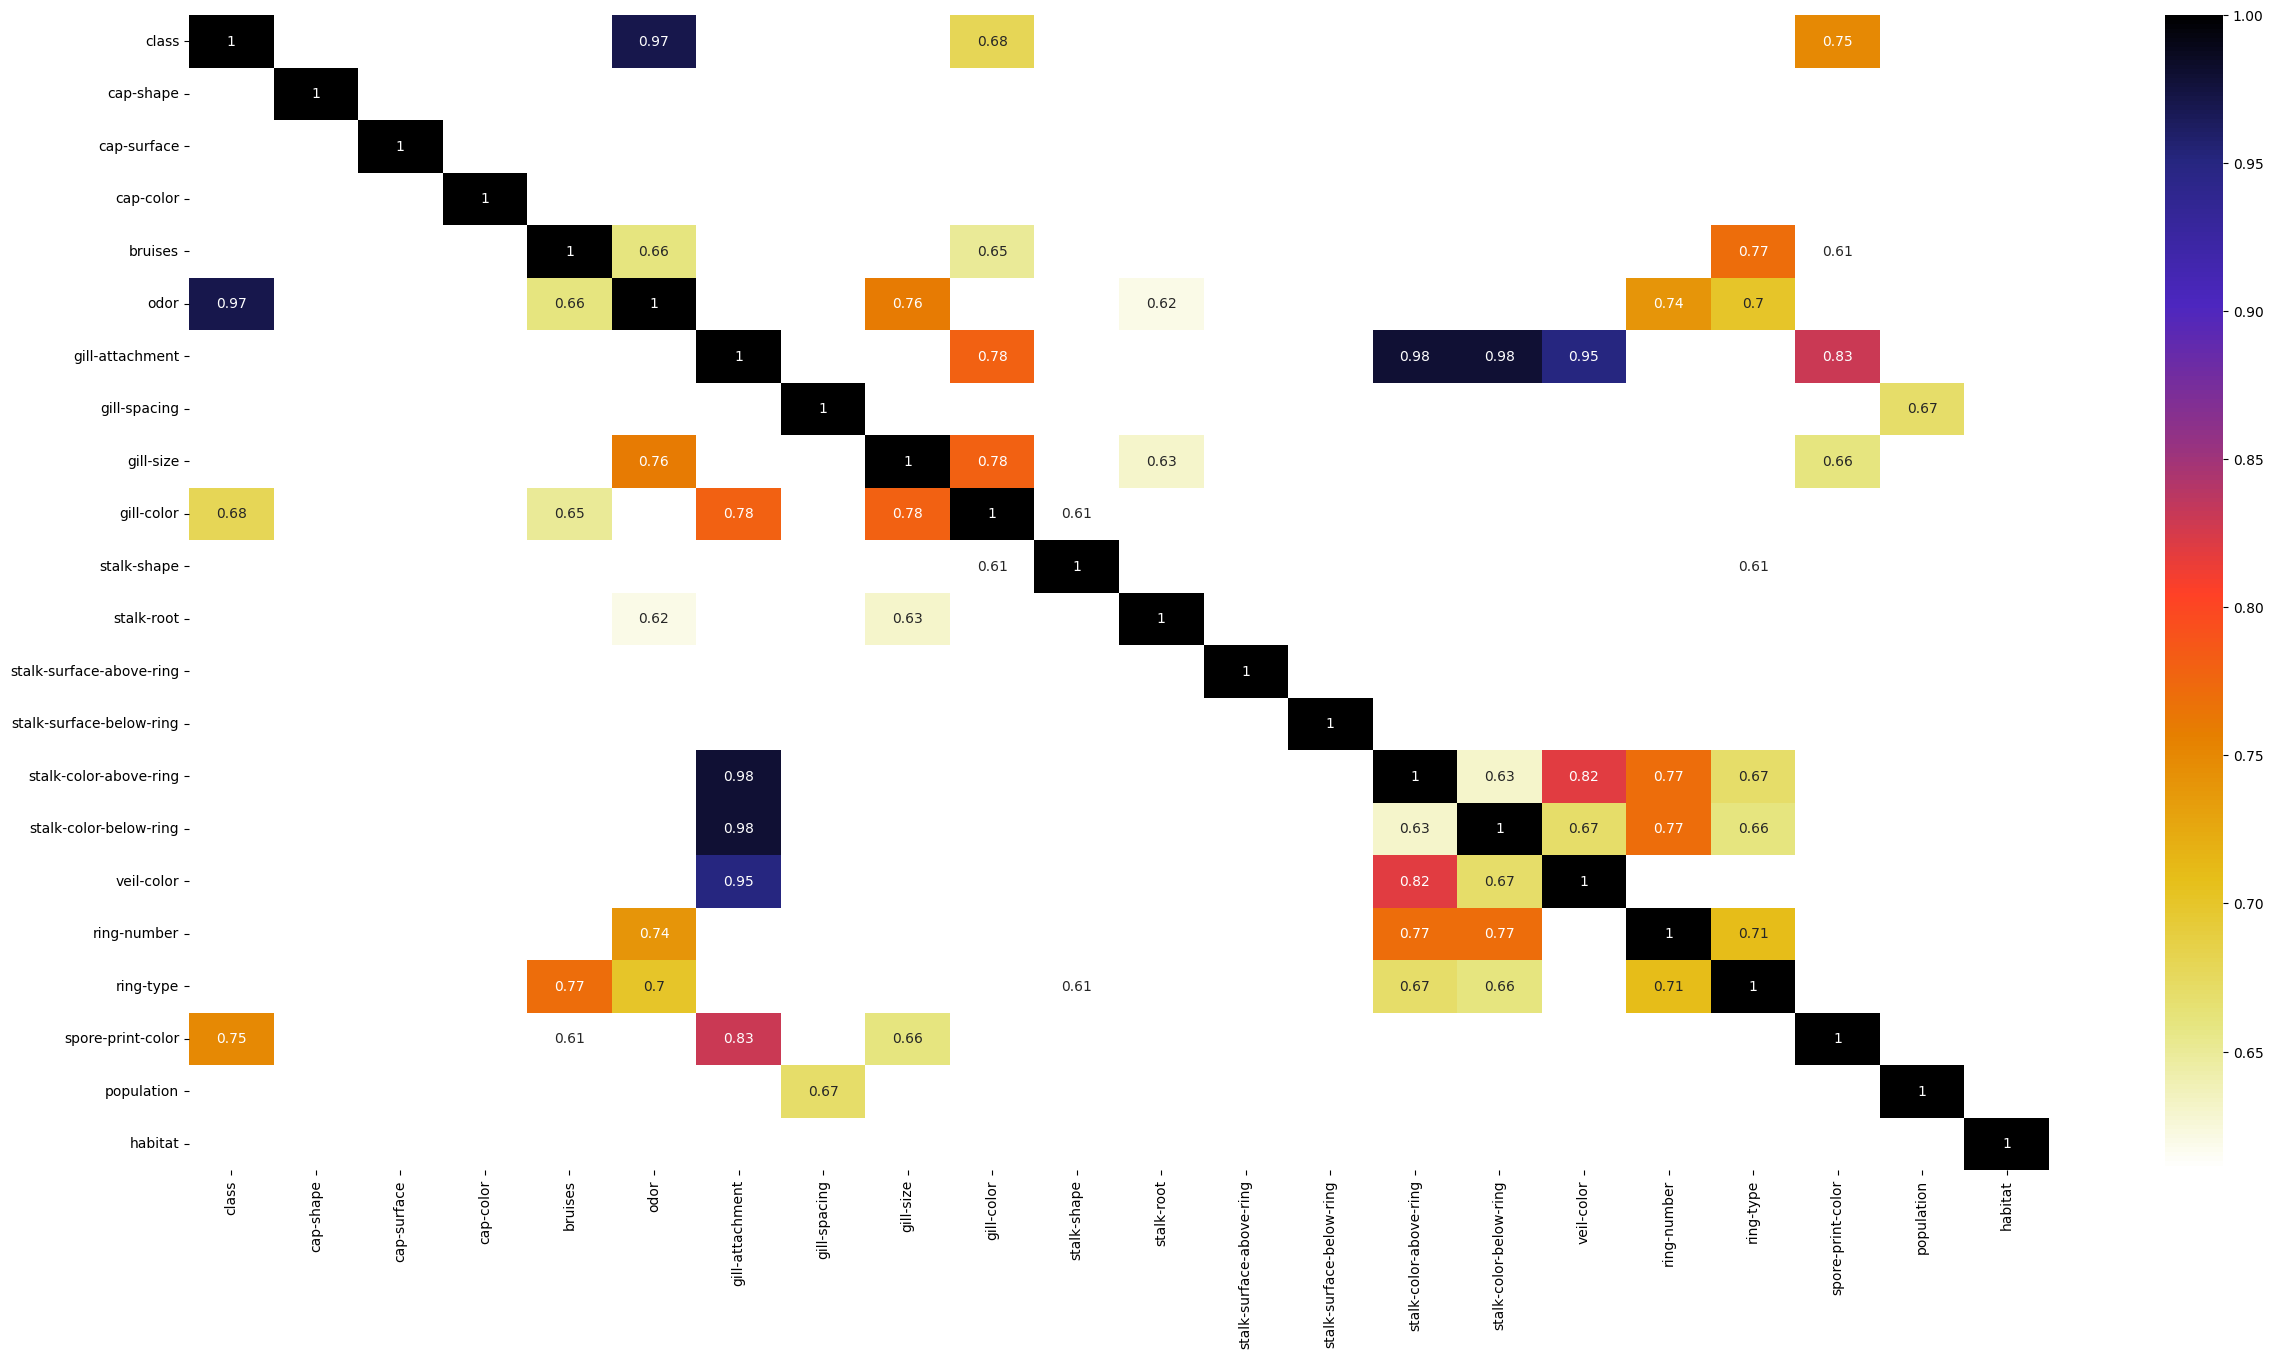

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df_corr[df_corr > 0.6], annot=True, cmap=plt.cm.CMRmap_r)

plt.show()


> TRY1 : gil-attachment, stalk-color-above-ring을 삭제해주고 진행하겠다.

In [155]:
train_col=list(train_df.columns)

train_col.remove('gill-attachment')
train_col.remove('stalk-color-above-ring')

> TRY2 : Target과 연관성이 높은 odor , spore-print-color만 사용하겠다.

In [202]:
train_col = ['odor','spore-print-color','class']

In [ ]:
train_col

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

# Data Preprocessing
> 모든 컬럼들이 Categorical하기때문에, unique한값이 3이상인 값들에 대해서 원핫인코딩 진행하고, unique 값이 2인 컬럼들은 라벨인코더만 진행한다.

In [204]:
train_df=train_df[train_col]

test_df = test_df[train_col]



In [205]:
one_hot_cols=list(train_df.columns[train_df.nunique()>2])

In [206]:
binary_cols=list(train_df.columns[train_df.nunique()==2])

In [207]:
binary_cols

['class']

In [208]:
one_hot_cols

['odor', 'spore-print-color']

> unique한 값이 3이상인 값들에 대해서만 원핫인코딩을 진행한다. 2인값들에 대해서는 라벨인코더만 진행한다.

> 일단 전체 column에 대해 LabelEncoder작업을 진행해준다.

In [176]:
train_df.nunique()

class          2
stalk-shape    2
dtype: int64

In [209]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in train_df.columns:
  enc.fit(train_df[col])
  train_df[col]=enc.transform(train_df[col])
  # Data Leakage에 유의한다.
  test_df[col]=enc.transform(test_df[col])




In [178]:
train_df

,class,stalk-shape
5174,1,0
7927,0,0
2641,0,1
5669,0,0
2043,0,1
...,...,...
3046,0,1
1725,1,0
4079,1,0
2254,0,1


In [129]:
test_df

,class,gill-color
5350,1,3
7926,1,0
4804,1,2
569,0,10
1844,0,7
...,...,...
529,0,10
6348,1,0
4659,1,2
5700,1,7


> 인덱스 초기화

In [210]:
train_df = train_df.reset_index(drop=True)

test_df = test_df.reset_index(drop=True)


> One hot Encoding

In [211]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 transform만 해야한다

for col in one_hot_cols:
  
  ohe.fit(train_df[[col]])
  train_cat=ohe.transform(train_df[[col]])
  train_df=pd.concat([train_df.drop(columns=[col]),
           pd.DataFrame(train_cat, columns=[col+"_"+ str(c) for c in ohe.categories_[0]])], axis=1)
  test_cat = ohe.transform(test_df[[col]])
  test_df = pd.concat([test_df.drop(columns=[col]),
           pd.DataFrame(test_cat, columns=[ col +"_"+ str(c) for c in ohe.categories_[0]])], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [181]:
test_df

,class,stalk-shape
0,1,1
1,1,1
2,1,0
3,0,0
4,0,1
...,...,...
1620,0,0
1621,1,1
1622,1,0
1623,1,0


In [212]:
y=train_df['class']
train=train_df.drop('class',axis=1)


In [213]:
y_test = test_df['class']

test=test_df.drop('class',axis=1)

In [214]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve, ConfusionMatrixDisplay

# Modeling
> SVC


> DT


> NN

> Confusion Matrix 출력을 위한 함수를 미리 생성한다.

In [37]:
def show_confusion(pred,y,model_name):
  confusionmatrix = confusion_matrix(y, pred)
  cm_display = ConfusionMatrixDisplay(confusionmatrix)
  cm_display.plot()
  plt.title(model_name)
  plt.show()

## SVC

> Optuna를 통해서 valid-set에 대해서 최적 하이퍼 파라미터를 추출하고, 이를 test set에 적용시킨다.

In [60]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.2 MB/s eta 0:00:00


In [61]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold

In [191]:
# 데이터 분리에서 x_train , x_valid , y_train , y_valid 
#분리해놓은 것을 통해 최적 파라미터를 탐색한다.

sampler = TPESampler(seed=10)

# define function
def objective(trial):
    cbrm_param = {
        
        
        "C" : trial.suggest_float('C', 0.01, 100.0,),
        "kernel" : trial.suggest_categorical("kernel", ["linear", "poly", "rbf"]),
        "probability" : True
    }

    # Generate model
   
    model_cbrm =SVC(**cbrm_param )

    # k겹 교차검증 실시
    n_folds=5
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True)
    
    # 추후 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
   
    
    m_f1 =0.0
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(train,y)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter+1,' 시작')
        X_tr = train.loc[train_index]
        y_tr = y.loc[train_index]
        X_te = train.loc[valid_index]
        y_te = y.loc[valid_index]


        model_cbrm = model_cbrm.fit(X_tr, y_tr)
        pred=model_cbrm.predict(X_te)
        print("macro-f1 score : ",f1_score(y_te,pred,average='macro'))
        m_f1+=f1_score(y_te,pred,average='macro')


                           
	# 평가지표 원하는 평가 지표가 있을 시 바꾸어 준다.
  
    m_f1 = m_f1 / n_folds
    return m_f1



In [215]:
hold_model=SVC()

hold_model.fit(train,y)

test_pred=hold_model.predict(test)

accuracy_score(y_test,test_pred)

0.9938461538461538

In [216]:

optuna_cbrm = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=3)

[I 2023-04-13 13:53:14,435] A new study created in memory with name: no-name-df3fec2e-ba0a-43b9-9edd-10bfd90e1988


	 폴드 세트:  1  시작
macro-f1 score :  0.9884308082237375
	 폴드 세트:  2  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  3  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  4  시작


[I 2023-04-13 13:53:15,423] Trial 0 finished with value: 0.9941399574362515 and parameters: {'C': 0.40478715012816596, 'kernel': 'poly'}. Best is trial 0 with value: 0.9941399574362515.


macro-f1 score :  0.9946035027418356
	 폴드 세트:  5  시작
macro-f1 score :  0.9969147677881807
	 폴드 세트:  1  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  2  시작
macro-f1 score :  0.9915185426602477
	 폴드 세트:  3  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.9953747628083491
	 폴드 세트:  5  시작


[I 2023-04-13 13:53:16,066] Trial 1 finished with value: 0.9941404214645356 and parameters: {'C': 72.17831419000564, 'kernel': 'poly'}. Best is trial 1 with value: 0.9941404214645356.


macro-f1 score :  0.9953715140861799
	 폴드 세트:  1  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  2  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  3  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  4  시작


[I 2023-04-13 13:53:16,892] Trial 2 finished with value: 0.9941403386299712 and parameters: {'C': 54.259011357446006, 'kernel': 'rbf'}. Best is trial 1 with value: 0.9941404214645356.


macro-f1 score :  0.9953747628083491
	 폴드 세트:  5  시작
macro-f1 score :  0.9945997181377133


In [217]:



cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))



Best Trial: score 0.9941404214645356,
params {'C': 72.17831419000564, 'kernel': 'poly'}


In [218]:
model = SVC(**cbrm_trial_params,probability=True)

model.fit(train_df,y)

SVC(C=72.17831419000564, kernel='poly', probability=True)

In [219]:
y_test_pred=model.predict(test_df)

In [220]:
y_test_proba=model.predict_proba(test_df)

In [221]:
accuracy_score(y_test,y_test_pred)

1.0

In [222]:
f1_score(y_test,y_test_pred,average="macro")

1.0

### SVC Confusion Matrix

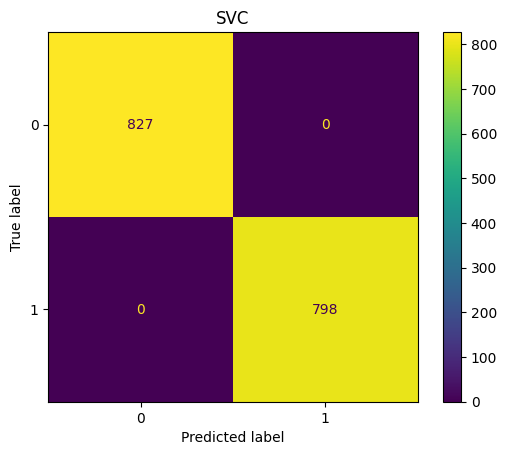

In [223]:
show_confusion(y_test_pred,y_test,"SVC")

### SVC Roc Curve

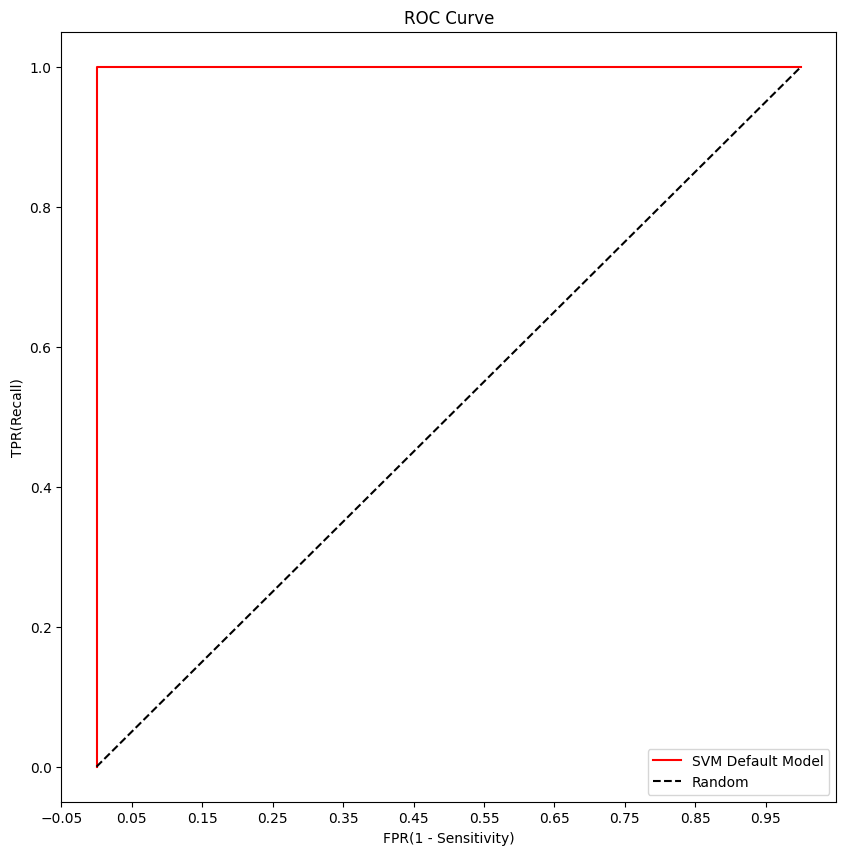

In [224]:

plt.figure(figsize=(10,10))
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba[:,1])

    # ROC 곡선 그래프 곡선으로 그림
plt.plot(fprs, tprs, label='SVM Default Model',color='red')

plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
#plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
plt.title('ROC Curve')
plt.legend()

## DecisionTree

> 파라미터 튜닝

In [225]:
# 데이터 분리에서 x_train , x_valid , y_train , y_valid 
#분리해놓은 것을 통해 최적 파라미터를 탐색한다.

sampler = TPESampler(seed=10)

# define function
def objective(trial):
    cbrm_param = {
        
        "criterion" : trial.suggest_categorical("criterion", ["gini", "entropy","log_loss"]),
        "max_depth" : trial.suggest_int("max_depth",4,30)
        
    }

    # Generate model
   
    n_folds=5
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True)
    
    # 추후 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
   
    model_cbrm =DecisionTreeClassifier(**cbrm_param )
    m_f1 =0.0
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(train,y)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter+1,' 시작')
        X_tr = train.loc[train_index]
        y_tr = y.loc[train_index]
        X_te = train.loc[valid_index]
        y_te = y.loc[valid_index]


        model_cbrm = model_cbrm.fit(X_tr, y_tr)
        pred=model_cbrm.predict(X_te)
        print("macro-f1 score : ",f1_score(y_te,pred,average='macro'))
        m_f1+=f1_score(y_te,pred,average='macro')


                           
	# 평가지표 원하는 평가 지표가 있을 시 바꾸어 준다.
  
    m_f1 = m_f1 / n_folds
    return m_f1



In [226]:

optuna_cbrm = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=20)

[I 2023-04-13 13:54:07,810] A new study created in memory with name: no-name-538ad95e-3e47-47e0-867c-25aa774359f3


	 폴드 세트:  1  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  2  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  3  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작


[I 2023-04-13 13:54:08,066] Trial 0 finished with value: 0.9941404061134543 and parameters: {'criterion': 'gini', 'max_depth': 24}. Best is trial 0 with value: 0.9941404061134543.


macro-f1 score :  0.9945997181377133
	 폴드 세트:  1  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  2  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  4  시작


[I 2023-04-13 13:54:08,370] Trial 1 finished with value: 0.9941404841551428 and parameters: {'criterion': 'gini', 'max_depth': 24}. Best is trial 1 with value: 0.9941404841551428.


macro-f1 score :  0.9946035027418356
	 폴드 세트:  5  시작
macro-f1 score :  0.9961431963787019
	 폴드 세트:  1  시작
macro-f1 score :  0.990746804088489
	 폴드 세트:  2  시작


[I 2023-04-13 13:54:08,653] Trial 2 finished with value: 0.9941403756734786 and parameters: {'criterion': 'log_loss', 'max_depth': 29}. Best is trial 1 with value: 0.9941404841551428.


macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  4  시작
macro-f1 score :  0.99306062581293
	 폴드 세트:  5  시작
macro-f1 score :  0.9969147677881807
	 폴드 세트:  1  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  2  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  3  시작


[I 2023-04-13 13:54:08,851] Trial 3 finished with value: 0.9941396892109434 and parameters: {'criterion': 'log_loss', 'max_depth': 20}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:08,944] Trial 4 finished with value: 0.9941401366240677 and parameters: {'criterion': 'log_loss', 'max_depth': 23}. Best is trial 1 with value: 0.9941404841551428.


macro-f1 score :  0.9946042706901019
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작
macro-f1 score :  0.9915113422701174
	 폴드 세트:  1  시작
macro-f1 score :  0.9915185426602477
	 폴드 세트:  2  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.996145907635787
	 폴드 세트:  5  시작
macro-f1 score :  0.9938278057588139
	 폴드 세트:  1  시작
macro-f1 score : 

[I 2023-04-13 13:54:09,026] Trial 5 finished with value: 0.9941402235724436 and parameters: {'criterion': 'gini', 'max_depth': 22}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,104] Trial 6 finished with value: 0.994139368965735 and parameters: {'criterion': 'log_loss', 'max_depth': 17}. Best is trial 1 with value: 0.9941404841551428.


 0.9946042706901019
	 폴드 세트:  2  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  3  시작
macro-f1 score :  0.9915185426602477
	 폴드 세트:  4  시작
macro-f1 score :  0.9969169399917943
	 폴드 세트:  5  시작
macro-f1 score :  0.9945997181377133
	 폴드 세트:  1  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  2  시작
macro-f1 score :  0.996917356704512
	 폴드 세트:  3  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작
macro-f1 score :  0.9907389363916785
	 폴드 세트:  1  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  2  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  4  시작


[I 2023-04-13 13:54:09,184] Trial 7 finished with value: 0.9941396861197674 and parameters: {'criterion': 'log_loss', 'max_depth': 18}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,268] Trial 8 finished with value: 0.9941404295300813 and parameters: {'criterion': 'gini', 'max_depth': 12}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,346] Trial 9 finished with value: 0.9941403027156713 and parameters: {'criterion': 'entropy', 'max_depth': 20}. Best is trial 1 with value: 0.9941404841551428.


macro-f1 score :  0.9899733671272392
	 폴드 세트:  5  시작
macro-f1 score :  0.9938278057588139
	 폴드 세트:  1  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  2  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  3  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작
macro-f1 score :  0.9945997181377133
	 폴드 세트:  1  시작
macro-f1 score :  0.990746804088489
	 폴드 세트:  2  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  3  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.996145907635787
	 폴드 세트:  5  시작
macro-f1 score :  0.9953715140861799
	 폴드 세트:  1  시작
macro-f1 score :  0.996917356704512


[I 2023-04-13 13:54:09,437] Trial 10 finished with value: 0.9941397625237048 and parameters: {'criterion': 'entropy', 'max_depth': 4}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,529] Trial 11 finished with value: 0.994139257416301 and parameters: {'criterion': 'gini', 'max_depth': 12}. Best is trial 1 with value: 0.9941404841551428.


	 폴드 세트:  2  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.9915172546751494
	 폴드 세트:  5  시작
macro-f1 score :  0.9930557741733722
	 폴드 세트:  1  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  2  시작
macro-f1 score :  0.9976881696527808
	 폴드 세트:  3  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작
macro-f1 score :  0.9907389363916785
	 폴드 세트:  1  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  2  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  3  시작


[I 2023-04-13 13:54:09,615] Trial 12 finished with value: 0.9941402258654672 and parameters: {'criterion': 'gini', 'max_depth': 11}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,698] Trial 13 finished with value: 0.99414016387632 and parameters: {'criterion': 'gini', 'max_depth': 12}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,784] Trial 14 finished with value: 0.9941401589374108 and parameters: {'criterion': 'gini', 'max_depth': 30}. Best is trial 1 with value: 0.9941404841551428.


macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.99306062581293
	 폴드 세트:  5  시작
macro-f1 score :  0.9938278057588139
	 폴드 세트:  1  시작
macro-f1 score :  0.990746804088489
	 폴드 세트:  2  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  3  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  4  시작
macro-f1 score :  0.996145907635787
	 폴드 세트:  5  시작
macro-f1 score :  0.9953715140861799
	 폴드 세트:  1  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  2  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  3  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작
macro-f1 score :  0.9938278057588139


[I 2023-04-13 13:54:09,870] Trial 15 finished with value: 0.9941402078743946 and parameters: {'criterion': 'gini', 'max_depth': 6}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:09,961] Trial 16 finished with value: 0.9941404810181729 and parameters: {'criterion': 'gini', 'max_depth': 26}. Best is trial 1 with value: 0.9941404841551428.


	 폴드 세트:  1  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  2  시작
macro-f1 score :  0.9899749373433584
	 폴드 세트:  3  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  4  시작
macro-f1 score :  0.99306062581293
	 폴드 세트:  5  시작
macro-f1 score :  0.9969147677881807
	 폴드 세트:  1  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  2  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  4  시작
macro-f1 score :  0.99306062581293
	 폴드 세트:  5  시작
macro-f1 score :  0.9961431963787019
	 폴드 세트:  1  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  2  시작
macro-f1 score :  0.9930616463823603

[I 2023-04-13 13:54:10,055] Trial 17 finished with value: 0.9941400534967688 and parameters: {'criterion': 'entropy', 'max_depth': 26}. Best is trial 1 with value: 0.9941404841551428.
[I 2023-04-13 13:54:10,144] Trial 18 finished with value: 0.994140178983136 and parameters: {'criterion': 'gini', 'max_depth': 27}. Best is trial 1 with value: 0.9941404841551428.



	 폴드 세트:  3  시작
macro-f1 score :  0.9961464377374016
	 폴드 세트:  4  시작
macro-f1 score :  0.9953747628083491
	 폴드 세트:  5  시작
macro-f1 score :  0.9930557741733722
	 폴드 세트:  1  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  2  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  3  시작
macro-f1 score :  0.9899749373433584
	 폴드 세트:  4  시작
macro-f1 score :  0.9953747628083491
	 폴드 세트:  5  시작
macro-f1 score :  0.9953715140861799
	 폴드 세트:  1  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  2  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  3  시작
macro-f1 score :  0.9915185426602477
	 폴드 세트:  4  시작


[I 2023-04-13 13:54:10,233] Trial 19 finished with value: 0.9941404967196202 and parameters: {'criterion': 'gini', 'max_depth': 27}. Best is trial 19 with value: 0.9941404967196202.


macro-f1 score :  0.996145907635787
	 폴드 세트:  5  시작
macro-f1 score :  0.9976862310859633


In [227]:



cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))



Best Trial: score 0.9941404967196202,
params {'criterion': 'gini', 'max_depth': 27}


In [228]:
model2=DecisionTreeClassifier(**cbrm_trial_params)

model2.fit(train_df,y)

DecisionTreeClassifier(max_depth=27)

In [229]:
y_test_pred=model2.predict(test_df)



In [230]:
y_test_proba=model2.predict_proba(test_df)

In [231]:
accuracy_score(y_test,y_test_pred)

1.0

In [232]:
f1_score(y_test,y_test_pred,average='macro')

1.0

### DT Confusion Matrix

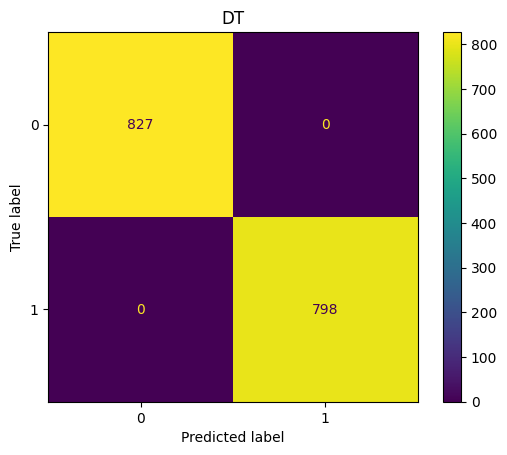

In [233]:
show_confusion(y_test_pred,y_test,"DT")

### DT Roc Curve

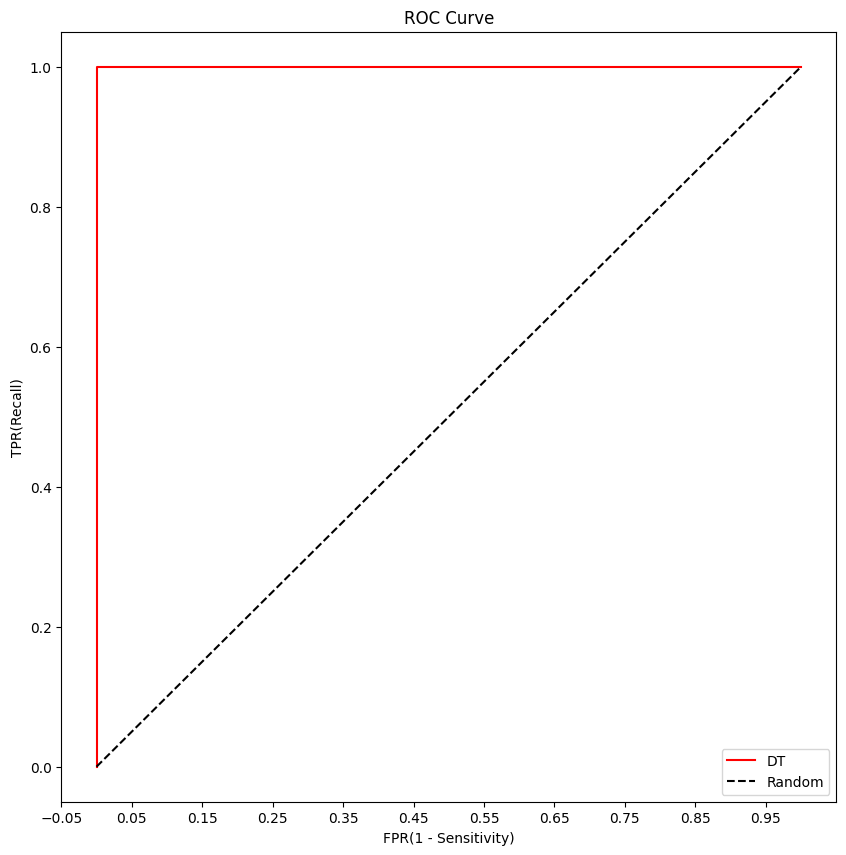

In [234]:

plt.figure(figsize=(10,10))
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba[:,1])

    # ROC 곡선 그래프 곡선으로 그림
plt.plot(fprs, tprs, label='DT',color='red')

plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
#plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
plt.title('ROC Curve')
plt.legend()

## MLP

> 파라미터 튜닝

In [235]:
# 데이터 분리에서 x_train , x_valid , y_train , y_valid 
#분리해놓은 것을 통해 최적 파라미터를 탐색한다.

sampler = TPESampler(seed=10)

# define function
def objective(trial):
    cbrm_param = {
        "learning_rate": trial.suggest_categorical("learning_rate",['constant','invscaling','adaptive']),
        
        
        "alpha": trial.suggest_categorical("alpha",[.3,.1,.01,.001,.0001]),
        "activation": trial.suggest_categorical("activation",['logistic','relu','tanh'])
    }

    n_folds=5
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True)
    
    # 추후 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    model_cbrm=MLPClassifier(**cbrm_param)
    
    m_f1 =0.0
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(train,y)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter+1,' 시작')
        X_tr = train.loc[train_index]
        y_tr = y.loc[train_index]
        X_te = train.loc[valid_index]
        y_te = y.loc[valid_index]


        model_cbrm = model_cbrm.fit(X_tr, y_tr)
        pred=model_cbrm.predict(X_te)
        print("macro-f1 score : ",f1_score(y_te,pred,average='macro'))
        m_f1+=f1_score(y_te,pred,average='macro')


                           
	# 평가지표 원하는 평가 지표가 있을 시 바꾸어 준다.
  
    m_f1 = m_f1 / n_folds
    return m_f1



In [236]:

optuna_cbrm = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=4)


[I 2023-04-13 13:55:12,348] A new study created in memory with name: no-name-15a4683e-0212-4c96-96bc-df64bbd267ef


	 폴드 세트:  1  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  2  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  3  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  4  시작
macro-f1 score :  0.993832124666994
	 폴드 세트:  5  시작


[I 2023-04-13 13:55:26,491] Trial 0 finished with value: 0.9941406350093718 and parameters: {'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'tanh'}. Best is trial 0 with value: 0.9941406350093718.


macro-f1 score :  0.9976862310859633
	 폴드 세트:  1  시작
macro-f1 score :  0.9930616463823603
	 폴드 세트:  2  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  3  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  4  시작
macro-f1 score :  0.99306062581293
	 폴드 세트:  5  시작


[I 2023-04-13 13:55:44,619] Trial 1 finished with value: 0.9941405211609811 and parameters: {'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'logistic'}. Best is trial 0 with value: 0.9941406350093718.


macro-f1 score :  0.9969147677881807
	 폴드 세트:  1  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  2  시작
macro-f1 score :  0.996917356704512
	 폴드 세트:  3  시작
macro-f1 score :  0.9953754099876915
	 폴드 세트:  4  시작
macro-f1 score :  0.9915172546751494
	 폴드 세트:  5  시작


[I 2023-04-13 13:55:59,304] Trial 2 finished with value: 0.9941399790677619 and parameters: {'learning_rate': 'invscaling', 'alpha': 0.001, 'activation': 'tanh'}. Best is trial 0 with value: 0.9941406350093718.


macro-f1 score :  0.9945997181377133
	 폴드 세트:  1  시작
macro-f1 score :  0.9938330170777988
	 폴드 세트:  2  시작
macro-f1 score :  0.9922901558337425
	 폴드 세트:  3  시작
macro-f1 score :  0.9946042706901019
	 폴드 세트:  4  시작
macro-f1 score :  0.9953747628083491
	 폴드 세트:  5  시작


[I 2023-04-13 13:56:23,298] Trial 3 finished with value: 0.9941403849095412 and parameters: {'learning_rate': 'constant', 'alpha': 0.1, 'activation': 'tanh'}. Best is trial 0 with value: 0.9941406350093718.


macro-f1 score :  0.9945997181377133


In [237]:



cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))



Best Trial: score 0.9941406350093718,
params {'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'tanh'}


In [238]:
mlp=MLPClassifier(**cbrm_trial_params)

In [239]:
mlp.fit(train_df,y)

MLPClassifier(activation='tanh')

In [240]:
y_test_pred=mlp.predict(test_df)

In [241]:
y_test_proba=mlp.predict_proba(test_df)

In [242]:
accuracy_score(y_test,y_test_pred)

1.0

### MLP Confusion Matrix

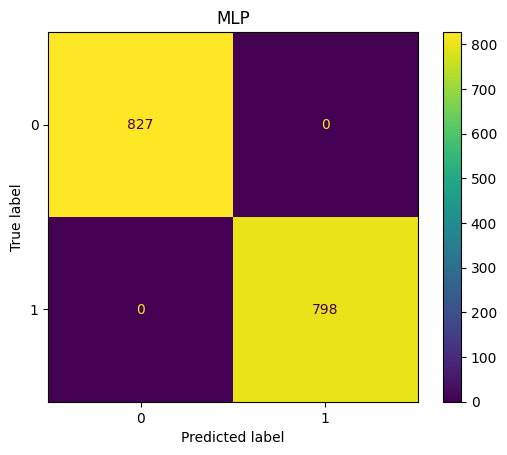

In [243]:
show_confusion(y_test_pred,y_test,"MLP")

### MLP Roc Curve

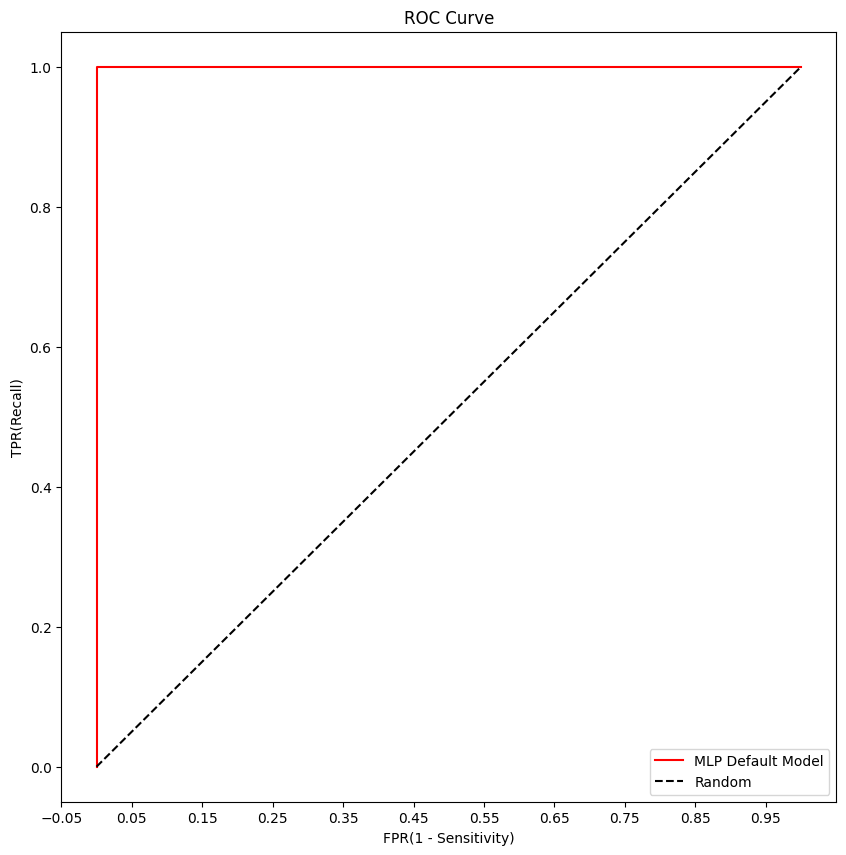

In [244]:

plt.figure(figsize=(10,10))
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba[:,1])

    # ROC 곡선 그래프 곡선으로 그림
plt.plot(fprs, tprs, label='MLP Default Model',color='red')

plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
#plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
plt.title('ROC Curve')
plt.legend()

## DNN

In [245]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.utils import to_categorical


# train : train, y / test : test / y_test

In [23]:
y_test

0       0
1       1
2       1
3       0
4       0
       ..
1620    1
1621    0
1622    1
1623    1
1624    1
Name: class, Length: 1625, dtype: int64

In [246]:
y_Train=to_categorical(y)

y_Test = to_categorical(y_test)

In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   odor_0               6499 non-null   float64
 1   odor_1               6499 non-null   float64
 2   odor_2               6499 non-null   float64
 3   odor_3               6499 non-null   float64
 4   odor_4               6499 non-null   float64
 5   odor_5               6499 non-null   float64
 6   odor_6               6499 non-null   float64
 7   odor_7               6499 non-null   float64
 8   odor_8               6499 non-null   float64
 9   spore-print-color_0  6499 non-null   float64
 10  spore-print-color_1  6499 non-null   float64
 11  spore-print-color_2  6499 non-null   float64
 12  spore-print-color_3  6499 non-null   float64
 13  spore-print-color_4  6499 non-null   float64
 14  spore-print-color_5  6499 non-null   float64
 15  spore-print-color_6  6499 non-null   f

In [253]:
model = keras.Sequential([keras.layers.Dense(5,input_shape=(18,)),
                          keras.layers.Dense(3,activation='relu'),
                          keras.layers.Dense(2,activation='softmax')])
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 95        
                                                                 
 dense_19 (Dense)            (None, 3)                 18        
                                                                 
 dense_20 (Dense)            (None, 2)                 8         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [117]:
train.shape

(6499, 9)

In [254]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train,y_Train,validation_split=0.1,epochs=25)

Epoch 1/25
183/183 [==============================] - 2s 5ms/step - loss: 0.6181 - accuracy: 0.7812 - val_loss: 0.5082 - val_accuracy: 0.9446
Epoch 2/25
183/183 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.9085 - val_loss: 0.3348 - val_accuracy: 0.9446
Epoch 3/25
183/183 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9598 - val_loss: 0.2488 - val_accuracy: 0.9892
Epoch 4/25
183/183 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9846 - val_loss: 0.2075 - val_accuracy: 0.9892
Epoch 5/25
183/183 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9846 - val_loss: 0.1802 - val_accuracy: 0.9892
Epoch 6/25
183/183 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9846 - val_loss: 0.1589 - val_accuracy: 0.9892
Epoch 7/25
183/183 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9846 - val_loss: 0.1410 - val_accuracy: 0.9892
Epoch 

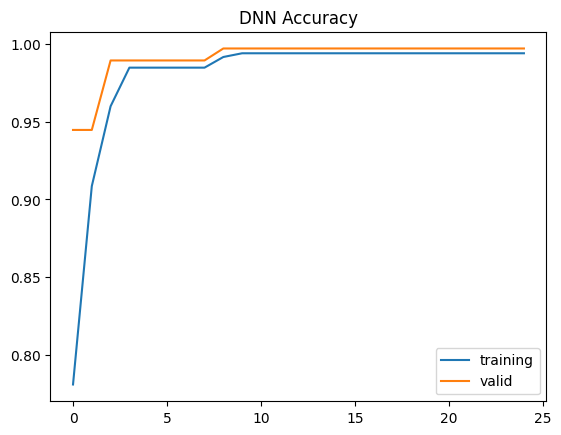

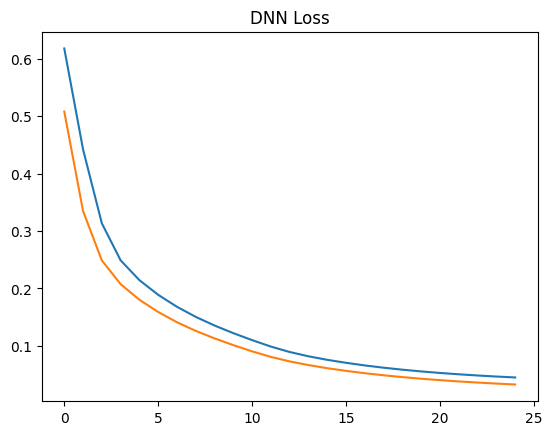

In [255]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("DNN Accuracy")

plt.legend(['training','valid'],loc='best')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("DNN Loss")

plt.show()

In [32]:
y_test

0       0
1       1
2       1
3       0
4       0
       ..
1620    1
1621    0
1622    1
1623    1
1624    1
Name: class, Length: 1625, dtype: int64

In [256]:
y_pred=model.predict(test)

y_pred_labels = []

for i in y_pred :
  if (np.argmax(i)>0):
     y_pred_labels.append(1)
  else : 
    y_pred_labels.append(0)

51/51 [==============================] - 0s 1ms/step


In [258]:
accuracy_score(y_test,y_pred_labels)

0.9938461538461538

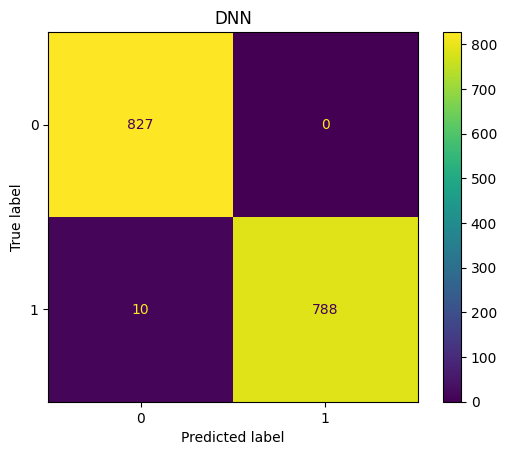

In [257]:
show_confusion(y_pred_labels , y_test,'DNN')